<ipython-input-3-0f8a499b66a4>:31: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdYlBu, marker='x', s=100, edgecolors='k')


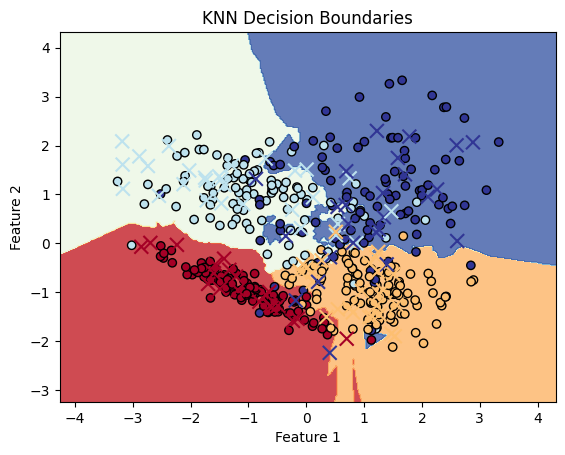

Train Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       105
           1       0.86      0.93      0.89        98
           2       0.85      0.80      0.83        97
           3       0.82      0.74      0.78       100

    accuracy                           0.87       400
   macro avg       0.86      0.87      0.86       400
weighted avg       0.87      0.87      0.87       400

Test Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90        20
           1       0.81      0.85      0.83        26
           2       0.85      0.79      0.82        29
           3       0.67      0.64      0.65        25

    accuracy                           0.80       100
   macro avg       0.80      0.81      0.80       100
weighted avg       0.80      0.80      0.80       100



In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# 1. Generate a Simulated Dataset
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_classes=4, n_clusters_per_class=1, random_state=16)


# 2. Split the Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

# 3. Apply K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn.fit(X_train, y_train)

# 4. Visualize Decision Boundaries
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu, marker='o', edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdYlBu, marker='x', s=100, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Decision Boundaries')
plt.show()

# 5. Model Validation
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print("Train Classification Report:\n", classification_report(y_train, y_train_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))


#The model performs reasonably well on the training set, with higher precision, recall, and F1-scores for classes 0 and 1 compared to classes 2 and 3.
#In the test set, class 0 is predicted the best with the highest precision, recall, and F1-score.
#The overall model performance is better on the training set than the test set, which is expected, but the model's performance on the test set is still reasonable.
#The class with the highest F1-score depends on whether you prioritize precision, recall, or a balance of both, and this can vary based on your specific problem's requirements. In this case, class 0 has the highest F1-score in both the training and test sets.
#